In [1]:
from pathlib import Path
import re
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from openpyxl.styles import PatternFill
import openpyxl

In [56]:
def combine_pac_excels(input_dir: str | Path,
                       output_path: str | Path = "combined_pac_results.xlsx",
                       sheet_name: str | int | None = 0) -> pd.DataFrame:
    """
    Read every Excel file in `input_dir`, add a 'pac' column derived from the filename,
    and write a single combined Excel file to `output_path`.

    - Filenames are expected like: 'aws_config_results_full_foalem.xlsx'
    - 'pac' is extracted as the part before '_results' (e.g., 'aws_config').

    Parameters
    ----------
    input_dir : str | Path
        Folder containing the Excel files (e.g., r'sampled_policies\\Taxonomy_foalem').
    output_path : str | Path
        Where to write the combined Excel file.
    sheet_name : str | int | None
        Sheet to read from each workbook (default first sheet). Use None to let
        pandas read all sheets and concatenate within each file before adding 'pac'.

    Returns
    -------
    pd.DataFrame
        The combined dataframe that is also written to `output_path`.
    """
    input_dir = Path(input_dir)
    output_path = Path(output_path)
    excel_paths = sorted(p for p in input_dir.glob("*.xlsx") if not p.name.startswith("~$"))

    if not excel_paths:
        raise FileNotFoundError(f"No .xlsx files found in: {input_dir}")

    dfs = []
    for path in excel_paths:
        # Derive pac name: capture everything before '_results'
        m = re.match(r"^(.*?)_results", path.stem, flags=re.IGNORECASE)
        pac_name = (m.group(1) if m else path.stem).strip()

        # Read one or all sheets
        if sheet_name is None:
            # Read all sheets and concat within-file first
            xls = pd.read_excel(path, sheet_name=None, engine="openpyxl")
            df_file = pd.concat(xls.values(), ignore_index=True)
        else:
            df_file = pd.read_excel(path, sheet_name=sheet_name, engine="openpyxl")

        df_file.insert(0, "pac", pac_name)  # put 'pac' as the first column
        dfs.append(df_file)

    combined = pd.concat(dfs, ignore_index=True)

    # Write output
    combined.to_excel(output_path, index=False, engine="openpyxl")
    return combined

In [57]:
combine_pac_excels(r"sampled_policies\Taxonomy_foalem",
                   r"sampled_policies\Taxonomy_foalem\all_pac_taxonomy_foalem.xlsx")

ValueError: cannot insert pac, already exists

In [58]:
combine_pac_excels(r"sampled_policies\PaC_Taxonomy_Leuson",
                   r"sampled_policies\Taxonomy_foalem\all_pac_taxonomy_leuson.xlsx")

,pac,Primary Purpose,Sub-purpose,Taxonomy Category,Taxonomy Sub-category,Policy Implemented,Target Resource,Rationale,Code Snippet,error,raw_output,taxonomy,sub-taxonomy,Resource,LLM judgement
0,aws_config,The policy addresses the governance of contain...,It aims to ensure that container images are sc...,Security Governance,Vulnerability Management,Enable image scanning on push for AWS ECR repo...,AWS ECR Repository,The policy enforces the scanning of container ...,"{\n ""version"": ""1.3"",\n ""accountId"": ""12...",NaN,NaN,Security Governance,Vulnerability Management,Clouds environment,Yes
1,aws_config,The policy ensures that ECS task definitions h...,It aims to enhance security by enforcing a spe...,Security Governance,Configuration Validation,ECS task definitions must have readonly root f...,ECS Task Definition,The policy enforces a security best practice b...,#\n# The following rule ensures that ECS task ...,NaN,NaN,Security Governance,Configuration Validation,Clouds environment,Yes
2,aws_config,The policy governs access control for an AWS E...,It specifically allows certain IAM users to pe...,Security Governance,Access Control,Allow specified IAM users to push and pull ima...,AWS ECR Repository,The policy explicitly defines which IAM users ...,"{\n ""AWSTemplateFormatVersion"": ""2010-09-09T0...",NaN,NaN,Security Governance,Access Control,Clouds environment,Yes
3,aws_config,The policy addresses the enforcement of securi...,It aims to ensure that only authorized users c...,Security Governance,Access Control,Restrict access to resources based on defined ...,Cloud environment,The policy enforces rules that limit access to...,# This file contains example Guard rules you w...,NaN,NaN,NO CODE SNIPPET,NO CODE SNIPPET,NO CODE SNIPPET,NO CODE SNIPPET
4,aws_config,The policy addresses the management and retrie...,It specifically aims to facilitate the paginat...,Security Governance,Vulnerability Management,Enforces structured pagination and retrieval o...,API,The policy ensures that image scan findings ar...,"{\n ""pagination"": {\n ""DescribeImageScanFi...",NaN,NaN,Security Governance,Vulnerability Management,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,sentinel,The policy addresses security governance by en...,It specifically aims to control who can access...,Security Governance,Access Control,Deny access to resources for users without the...,API,The policy enforces access control by ensuring...,ver: 0,NaN,NaN,-,-,-,-
303,sentinel,The policy addresses the enforcement of secure...,It specifically aims to validate the structura...,Security Governance,Configuration Validation,Enforce valid configuration formats for cloud ...,Cloud environment,The policy ensures that only correctly structu...,2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2...,NaN,NaN,-,-,-,-
304,sentinel,The policy ensures that default network ACLs i...,It aims to prevent the creation or update of d...,Security Governance,Network Management,Deny creation or update of default network ACL...,AWS Default Network ACL,The policy enforces strict rules on network AC...,"import ""tfplan/v2"" as tfplan\n\nallDefaultNetw...",NaN,NaN,Security Governance,Network Management,NaN,NaN
305,sentinel,The policy addresses security governance by en...,It specifically aims to control who can access...,Security Governance,Access Control,Deny access to resources for users who do not ...,API,The policy enforces role-based access control ...,ver: 2,NaN,NaN,-,-,-,-


In [59]:
df_patrick = pd.read_excel("sampled_policies/Taxonomy_foalem/all_pac_taxonomy_foalem.xlsx")
df_patrick

,pac,Primary Purpose,Sub-purpose,Taxonomy Category,taxonomy foalem,Taxonomy Sub-category,sub-taxonomy foalem,Policy Implemented,Target Resource,Resource foalem,Rationale,Code Snippet,error,raw_output,LLM judgement foalem
0,aws_config,The policy addresses the governance of contain...,It aims to ensure that container images are sc...,Security Governance,Security Governance,Vulnerability Management,NaN,Enable image scanning on push for AWS ECR repo...,AWS ECR Repository,NaN,The policy enforces the scanning of container ...,"{\n ""version"": ""1.3"",\n ""accountId"": ""12...",NaN,NaN,Yes
1,aws_config,The policy ensures that ECS task definitions h...,It aims to enhance security by enforcing a spe...,Security Governance,Security Governance,Configuration Validation,Configuration Validation,ECS task definitions must have readonly root f...,ECS Task Definition,NaN,The policy enforces a security best practice b...,#\n# The following rule ensures that ECS task ...,NaN,NaN,Yes
2,aws_config,The policy governs access control for an AWS E...,It specifically allows certain IAM users to pe...,Security Governance,Security Governance,Access Control,Access Control,Allow specified IAM users to push and pull ima...,AWS ECR Repository,NaN,The policy explicitly defines which IAM users ...,"{\n ""AWSTemplateFormatVersion"": ""2010-09-09T0...",NaN,NaN,Yes
3,aws_config,The policy addresses the enforcement of securi...,It aims to ensure that only authorized users c...,Security Governance,NaN,Access Control,NaN,Restrict access to resources based on defined ...,Cloud environment,NaN,The policy enforces rules that limit access to...,# This file contains example Guard rules you w...,NaN,NaN,No
4,aws_config,The policy addresses the management and retrie...,It specifically aims to facilitate the paginat...,Security Governance,Security Governance,Vulnerability Management,NaN,Enforces structured pagination and retrieval o...,API,NaN,The policy ensures that image scan findings ar...,"{\n ""pagination"": {\n ""DescribeImageScanFi...",NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,sentinel,The policy addresses security governance by en...,It specifically aims to control who can access...,Security Governance,NaN,Access Control,NaN,Deny access to resources for users without the...,API,NaN,The policy enforces access control by ensuring...,ver: 0,NaN,NaN,No
302,sentinel,The policy addresses the enforcement of secure...,It specifically aims to validate the structura...,Security Governance,NaN,Configuration Validation,NaN,Enforce valid configuration formats for cloud ...,Cloud environment,NaN,The policy ensures that only correctly structu...,2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2...,NaN,NaN,No
303,sentinel,The policy ensures that default network ACLs i...,It aims to prevent the creation or update of d...,Security Governance,Security Governance,Network Management,Network Management,Deny creation or update of default network ACL...,AWS Default Network ACL,NaN,The policy enforces strict rules on network AC...,"import ""tfplan/v2"" as tfplan\n\nallDefaultNetw...",NaN,NaN,Yes
304,sentinel,The policy addresses security governance by en...,It specifically aims to control who can access...,Security Governance,NaN,Access Control,NaN,Deny access to resources for users who do not ...,API,NaN,The policy enforces role-based access control ...,ver: 2,NaN,NaN,No


In [65]:
df_leuson = pd.read_excel("sampled_policies/Taxonomy_foalem/all_pac_taxonomy_leuson.xlsx")
df_leuson

,pac,Primary Purpose,Sub-purpose,Taxonomy Category,Taxonomy Sub-category,Policy Implemented,Target Resource,Rationale,Code Snippet,error,raw_output,taxonomy,sub-taxonomy,Resource,LLM judgement
0,aws_config,The policy addresses the governance of contain...,It aims to ensure that container images are sc...,Security Governance,Vulnerability Management,Enable image scanning on push for AWS ECR repo...,AWS ECR Repository,The policy enforces the scanning of container ...,"{\n ""version"": ""1.3"",\n ""accountId"": ""12...",NaN,NaN,Security Governance,Vulnerability Management,Clouds environment,Yes
1,aws_config,The policy ensures that ECS task definitions h...,It aims to enhance security by enforcing a spe...,Security Governance,Configuration Validation,ECS task definitions must have readonly root f...,ECS Task Definition,The policy enforces a security best practice b...,#\n# The following rule ensures that ECS task ...,NaN,NaN,Security Governance,Configuration Validation,Clouds environment,Yes
2,aws_config,The policy governs access control for an AWS E...,It specifically allows certain IAM users to pe...,Security Governance,Access Control,Allow specified IAM users to push and pull ima...,AWS ECR Repository,The policy explicitly defines which IAM users ...,"{\n ""AWSTemplateFormatVersion"": ""2010-09-09T0...",NaN,NaN,Security Governance,Access Control,Clouds environment,Yes
3,aws_config,The policy addresses the enforcement of securi...,It aims to ensure that only authorized users c...,Security Governance,Access Control,Restrict access to resources based on defined ...,Cloud environment,The policy enforces rules that limit access to...,# This file contains example Guard rules you w...,NaN,NaN,NO CODE SNIPPET,NO CODE SNIPPET,NO CODE SNIPPET,NO CODE SNIPPET
4,aws_config,The policy addresses the management and retrie...,It specifically aims to facilitate the paginat...,Security Governance,Vulnerability Management,Enforces structured pagination and retrieval o...,API,The policy ensures that image scan findings ar...,"{\n ""pagination"": {\n ""DescribeImageScanFi...",NaN,NaN,Security Governance,Vulnerability Management,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,sentinel,The policy addresses security governance by en...,It specifically aims to control who can access...,Security Governance,Access Control,Deny access to resources for users without the...,API,The policy enforces access control by ensuring...,ver: 0,NaN,NaN,-,-,-,-
303,sentinel,The policy addresses the enforcement of secure...,It specifically aims to validate the structura...,Security Governance,Configuration Validation,Enforce valid configuration formats for cloud ...,Cloud environment,The policy ensures that only correctly structu...,2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2...,NaN,NaN,-,-,-,-
304,sentinel,The policy ensures that default network ACLs i...,It aims to prevent the creation or update of d...,Security Governance,Network Management,Deny creation or update of default network ACL...,AWS Default Network ACL,The policy enforces strict rules on network AC...,"import ""tfplan/v2"" as tfplan\n\nallDefaultNetw...",NaN,NaN,Security Governance,Network Management,NaN,NaN
305,sentinel,The policy addresses security governance by en...,It specifically aims to control who can access...,Security Governance,Access Control,Deny access to resources for users who do not ...,API,The policy enforces role-based access control ...,ver: 2,NaN,NaN,-,-,-,-


In [135]:
df_leuson_patrick = pd.read_excel("sampled_policies/Taxonomy_foalem/all_pac_taxonomy_patrick_leuson.xlsx")
df_leuson_patrick

,pac,taxonomy,sub-taxonomy,Resource,taxonomy foalem,sub-taxonomy foalem,Resource foalem,Code Snippet
0,aws_config,Security Governance,Vulnerability Management,Clouds environment,Security Governance,Vulnerability Management,NaN,"{\n ""version"": ""1.3"",\n ""accountId"": ""12..."
1,aws_config,Security Governance,Configuration Validation,Clouds environment,Security Governance,Configuration Validation,NaN,#\n# The following rule ensures that ECS task ...
2,aws_config,Security Governance,Access Control,Clouds environment,Security Governance,Access Control,NaN,"{\n ""AWSTemplateFormatVersion"": ""2010-09-09T0..."
3,aws_config,NaN,NaN,NaN,NaN,NaN,NaN,# This file contains example Guard rules you w...
4,aws_config,Security Governance,Vulnerability Management,NaN,Security Governance,Vulnerability Management,NaN,"{\n ""pagination"": {\n ""DescribeImageScanFi..."
...,...,...,...,...,...,...,...,...
301,sentinel,NaN,NaN,NaN,NaN,NaN,NaN,ver: 0
302,sentinel,NaN,NaN,NaN,NaN,NaN,NaN,2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2.0\n2...
303,sentinel,Security Governance,Network Management,NaN,Security Governance,Network Management,NaN,"import ""tfplan/v2"" as tfplan\n\nallDefaultNetw..."
304,sentinel,NaN,NaN,NaN,NaN,NaN,NaN,ver: 2


In [136]:
def calculate_kappa_and_highlight_disagreements(df: pd.DataFrame, column1: str, column2: str, output_file: str):
    """
    Calculate the Cohen's Kappa score for the agreement between two label columns, 
    highlight the disagreement rows, and save the results to an Excel file.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column1 (str): The name of the first label column (e.g., 'Label_Patrick').
    - column2 (str): The name of the second label column (e.g., 'Label_Leuson').
    - output_file (str): The file path to save the resulting DataFrame with highlighted rows.
    
    Returns:
    - kappa_score (float): The Cohen's Kappa score.
    """
    
    # Convert both columns to strings, and handle NaN as 'missing' category
    df[column1] = df[column1].fillna('missing').astype(str)
    df[column2] = df[column2].fillna('missing').astype(str)
    
    # Calculate Cohen's Kappa score
    kappa_score = cohen_kappa_score(df[column1], df[column2])
    
    # Highlight the disagreement rows
    df['Disagreement'] = df[column1] != df[column2]
    
    # Save to Excel
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        df.to_excel(writer, index=False, sheet_name='Kappa Results')
        
        # Access the openpyxl workbook and sheet
        workbook = writer.book
        sheet = workbook['Kappa Results']
        
        # Define the red fill for disagreement
        red_fill = PatternFill(start_color='FF0000', end_color='FF0000', fill_type='solid')
        
        # Loop through rows and apply red fill for disagreement
        for row_idx, row in df.iterrows():
            if row['Disagreement']:  # If there's disagreement
                for col_idx, col_name in enumerate(df.columns):
                    cell = sheet.cell(row=row_idx + 2, column=col_idx + 1)  # +2 to account for header row
                    cell.fill = red_fill

    # Return the Kappa score
    return kappa_score

In [138]:
# Call the function
kappa = calculate_kappa_and_highlight_disagreements(df_leuson_patrick, 'taxonomy', 'taxonomy foalem', 'taxonomy_disagreement_highlighted.xlsx')

# Print Cohen's Kappa score
print(f"Cohen's Kappa score: {kappa}")


Cohen's Kappa score: 0.8431975403535742


In [139]:
# Call the function
kappa = calculate_kappa_and_highlight_disagreements(df_leuson_patrick, 'sub-taxonomy', 'sub-taxonomy foalem', 'sub-taxonomy_disagreement_highlighted.xlsx')

# Print Cohen's Kappa score
print(f"Cohen's Kappa score: {kappa}")


Cohen's Kappa score: 0.8401629710883021


In [13]:
df_taxonomy_disagreement_highlighted = pd.read_excel("taxonomy_disagreement_highlighted - Copy.xlsx")

In [14]:
import matplotlib.pyplot as plt
def plot_pac_vs_taxonomy(
    df, 
    pac_col="pac", 
    taxonomy_col="taxonomy",
    label_fontsize=18,          # <-- bigger axis label font
    tick_fontsize=12,            # <-- tick label font
    pdf_path: str | None = None,  # e.g., "outputs/pac_vs_taxonomy.pdf"
):
    """
    Create a bubble scatter plot of PaC tools vs taxonomy categories,
    with bubble sizes proportional to percentage representation 
    (occurrence / total per PaC tool * 100).
    """

    # Remove rows where 'taxonomy' is 'missing'
    df = df[df[taxonomy_col] != 'missing']
    # Count occurrences of each (pac, taxonomy) pair
    counts = df.groupby([pac_col, taxonomy_col]).size().reset_index(name="count")
    # print(counts)
    # Compute total per PaC tool
    totals = counts.groupby(pac_col)["count"].sum().rename("total")
    counts = counts.merge(totals, on=pac_col)
    # print(totals)
    # print(counts)
    # Compute percentage
    counts["percentage"] = counts["count"] / counts["total"] * 100
    # print(counts['percentage'])

    # Plot
    fig = plt.figure(figsize=(7, 8))
    plt.scatter(
        counts[taxonomy_col],
        counts[pac_col],
        s=counts["percentage"] * 15,   # size scale
        c="gray",
        alpha=0.6,
        edgecolors="black",
        linewidth=1.5
    )

    # Axis formatting
    plt.xticks(rotation=90, ha="right", fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.xlabel("Main categories of purpose", fontsize=label_fontsize)
    plt.ylabel("PaC tools", fontsize=label_fontsize)

    # Bold borders around figure
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    # ---- Custom legend (20-40-60) ----
    legend_vals = [20, 40, 60]
    legend_handles = [
        plt.scatter([], [], s=v*15, c="gray", alpha=0.6, 
                    edgecolors="black", linewidth=1.5) for v in legend_vals
    ]
    legend_anchor_x = 0.56  # move right/left if needed
    plt.legend(
        legend_handles, 
        [str(v) for v in legend_vals],
        loc="upper center",
        bbox_to_anchor=(legend_anchor_x, 1.12),
        ncol=len(legend_vals),
        frameon=False,
        scatterpoints=1,
        borderpad=0.0,
    )
    # inline legend title
    ax.text(
        legend_anchor_x - 0.3, 1.10, "Value",
        transform=ax.transAxes, va="center", ha="right", fontsize=tick_fontsize
    )

    # Set grid with light gray color
    plt.grid(True, color='lightgray', linestyle='-', linewidth=0.5)

    plt.tight_layout()
        # ---- Save to PDF if requested ----
    if pdf_path:
        Path(pdf_path).parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(pdf_path, format="pdf", bbox_inches="tight")
        
    plt.show()

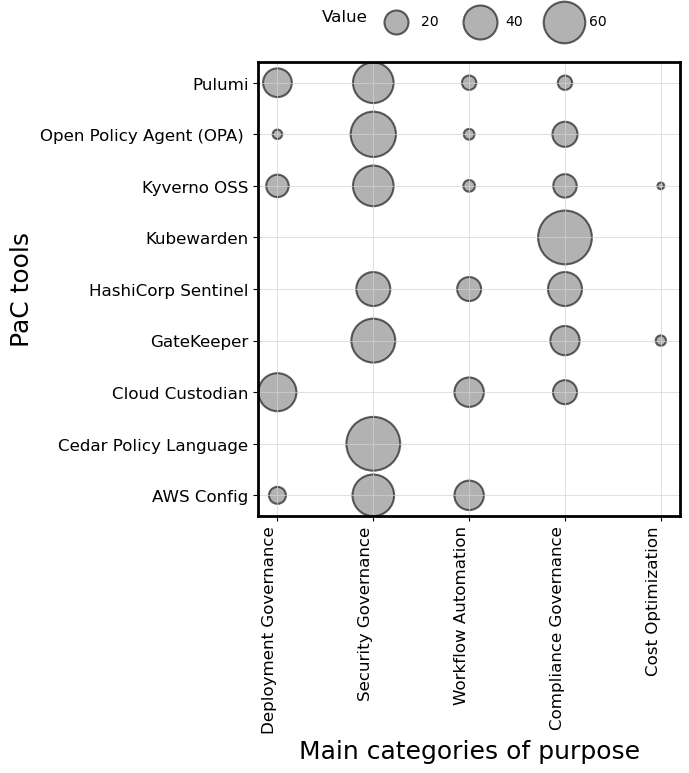

In [15]:
# Example call
plot_pac_vs_taxonomy(df_taxonomy_disagreement_highlighted, pac_col="pac", taxonomy_col="taxonomy", pdf_path="outputs/pac_vs_taxonomy.pdf")

In [43]:
import pandas as pd
from typing import Tuple

def taxonomy_statistics(
    excel_path: str,
    sheet_name=0,
    tax_col: str = "taxonomy",
    sub_col: str = "sub_taxonomy",
    decimals: int = 1,
    drop_missing: bool = True,
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Read an Excel file and compute percentage statistics for each distinct
    element in `taxonomy` and the corresponding `sub-taxonomy`.

    Percentages:
      - Top-level taxonomy: % of total rows (overall).
      - Sub-taxonomy: % of total rows (overall, sums to the parent’s %)
        + the conditional % within its parent taxonomy.

    Returns
    -------
    taxonomy_df : DataFrame  [taxonomy, count, pct_overall]
    sub_taxonomy_df : DataFrame  [taxonomy, sub_taxonomy, count, pct_overall, pct_within_taxonomy]
    """
    df = pd.read_excel(excel_path, sheet_name=sheet_name)

    # Resolve column names robustly
    cols_lc = {c.lower().strip(): c for c in df.columns}
    def _resolve(candidates):
        for c in candidates:
            if c in df.columns: return c
            lc = c.lower().strip()
            if lc in cols_lc: return cols_lc[lc]
        return None

    tax_real = _resolve([tax_col, "taxonomy", "taxonomie"])
    sub_real = _resolve([sub_col, "sub_taxonomy", "sub-taxonomy", "sub taxonomy"])
    if tax_real is None:
        raise ValueError("Could not locate the taxonomy column. Use `tax_col=`.")
    if sub_real is None:
        raise ValueError("Could not locate the sub-taxonomy column. Use `sub_col=`.")

    # Clean and (optionally) drop ‘missing’
    df[tax_real] = df[tax_real].astype(str).str.strip()
    df[sub_real] = df[sub_real].astype(str).str.strip()
    if drop_missing:
        df = df[~df[tax_real].str.lower().isin(["", "nan", "none", "missing"])]

    total = len(df)
    if total == 0:
        raise ValueError("No rows left after filtering.")

    # Top-level taxonomy stats (overall)
    taxonomy_df = (
        df.groupby(tax_real, dropna=False)
          .size().reset_index(name="count")
          .rename(columns={tax_real: "taxonomy"})
    )
    taxonomy_df["pct_overall"] = (taxonomy_df["count"] / total * 100).round(decimals)
    taxonomy_df = taxonomy_df.sort_values("pct_overall", ascending=False).reset_index(drop=True)

    # Sub-taxonomy stats (overall + within parent)
    sub_df = (
        df.groupby([tax_real, sub_real], dropna=False)
          .size().reset_index(name="count")
          .rename(columns={tax_real: "taxonomy", sub_real: "sub_taxonomy"})
    )
    sub_df["pct_overall"] = (sub_df["count"] / total * 100).round(decimals)
    sub_df = sub_df.merge(
        taxonomy_df[["taxonomy", "count"]].rename(columns={"count": "parent_count"}),
        on="taxonomy",
        how="left"
    )
    sub_df["pct_within_taxonomy"] = (sub_df["count"] / sub_df["parent_count"] * 100).round(decimals)
    sub_df = sub_df.sort_values(["taxonomy", "pct_overall"], ascending=[True, False]).reset_index(drop=True)

    return taxonomy_df, sub_df

In [44]:
# Example:
taxonomy_df, sub_df = taxonomy_statistics("Taxonomy Statistic.xlsx")

In [45]:
taxonomy_df

,taxonomy,count,pct_overall
0,Security Governance,233,65.4
1,Compliance Governance,76,21.3
2,Deployment Governance,25,7.0
3,Workflow Automation,20,5.6
4,Cost Optimization,2,0.6


In [46]:
sub_df

,taxonomy,sub_taxonomy,count,pct_overall,parent_count,pct_within_taxonomy
0,Compliance Governance,Resource Compliance,56,15.7,76,73.7
1,Compliance Governance,Standards Enforcement,14,3.9,76,18.4
2,Compliance Governance,Service Compliance,4,1.1,76,5.3
3,Compliance Governance,Third-party License,2,0.6,76,2.6
4,Cost Optimization,nan,2,0.6,2,100.0
5,Deployment Governance,Access Control,22,6.2,25,88.0
6,Deployment Governance,Key Management,3,0.8,25,12.0
7,Security Governance,Access Control,83,23.3,233,35.6
8,Security Governance,Configuration Validation,69,19.4,233,29.6
9,Security Governance,Resource Management,31,8.7,233,13.3


In [47]:
taxonomy_df.to_csv("Taxonomy_category_percentage.csv")

In [49]:
sub_df[["taxonomy", "sub_taxonomy", "pct_within_taxonomy"]].to_csv("Taxonomy_subcategory_percentage.csv")